## Creating a baseline model using the cleaned data (before advanced feature engineering)

In [1]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv")

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (74943, 208)
X_test shape: (18736, 208)


In [4]:
X_train.head(20)

,one_hot__ac_5K 343TQY,one_hot__ac_5K 345TFX,one_hot__ac_5M 343FOX,one_hot__ac_5M 343JAI,one_hot__ac_5M 343SUN,one_hot__ac_6P M87TRJ,one_hot__ac_BJ 320INA,one_hot__ac_BJ 320INB,one_hot__ac_BJ 320INC,one_hot__ac_BJ 320INH,...,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__s_std_time_dec,passthrough__c_std_time_dec,passthrough__s_std_day_year,passthrough__c_std_day_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,0.156434,-9.876883e-01,0.746972,0.664855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,False,-0.998630,5.233596e-02,0.835925,-0.548843
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,-0.453990,-8.910065e-01,0.471160,-0.882048
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.649448,-7.604060e-01,0.463550,0.886071
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.500000,-8.660254e-01,-0.845249,-0.534373
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,0.333807,-9.426415e-01,0.972118,-0.234491
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,True,0.913545,-4.067366e-01,-0.077386,-0.997001
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,False,0.972370,2.334454e-01,-0.230306,-0.973118
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,-0.991445,-1.305262e-01,0.471160,-0.882048
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,False,-0.669131,7.431448e-01,-0.025818,-0.999667


In [5]:
print("Remaining Features in X_train:")
print(X_train.columns)

Remaining Features in X_train:
Index(['one_hot__ac_5K 343TQY', 'one_hot__ac_5K 345TFX',
       'one_hot__ac_5M 343FOX', 'one_hot__ac_5M 343JAI',
       'one_hot__ac_5M 343SUN', 'one_hot__ac_6P M87TRJ',
       'one_hot__ac_BJ 320INA', 'one_hot__ac_BJ 320INB',
       'one_hot__ac_BJ 320INC', 'one_hot__ac_BJ 320INH',
       ...
       'one_hot__type_dep_medium_airport', 'one_hot__type_dep_small_airport',
       'one_hot__type_arr_large_airport', 'one_hot__type_arr_medium_airport',
       'one_hot__type_arr_small_airport', 'passthrough__is_same_country',
       'passthrough__s_std_time_dec', 'passthrough__c_std_time_dec',
       'passthrough__s_std_day_year', 'passthrough__c_std_day_year'],
      dtype='object', length=208)


In [13]:
# Initialize Linear Regression model
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (MSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 58.83
Mean Squared Error (MSE): 14651.24
Root Mean Squared Error (MSE): 121.04
R^2 Score: 0.05


In [7]:
# # Calculate residuals
# residuals = y_test.values.flatten() - y_pred
# # Standardize residuals
# standardized_residuals = residuals / np.std(residuals)
# # Create a residual plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred, standardized_residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Predicted Value')
# plt.ylabel('Standardized Residual')
# plt.title('Residual Plot')
# plt.show()

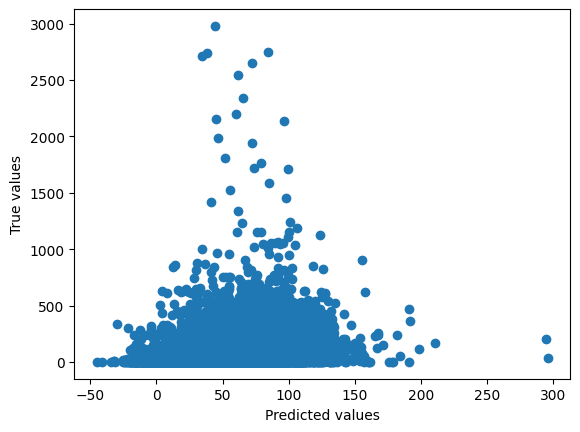

In [8]:
plt.scatter(y_pred, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

(array([1.090e+02, 2.252e+03, 7.703e+03, 6.789e+03, 1.706e+03, 1.570e+02,
        1.600e+01, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([-45.04493601, -10.93253078,  23.17987444,  57.29227967,
         91.40468489, 125.51709012, 159.62949534, 193.74190056,
        227.85430579, 261.96671101, 296.07911624]),
 <BarContainer object of 10 artists>)

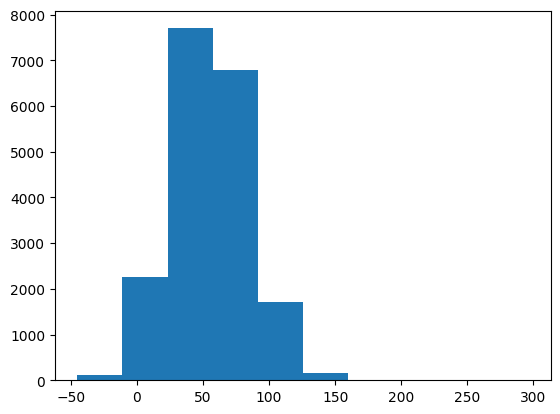

In [9]:
plt.hist(y_pred)

In [10]:
rows_with_all_false_or_zero = X_train[ (X_train == False)].all(axis=1) # Filter the rows 
result = X_train[rows_with_all_false_or_zero]
result 

,one_hot__ac_5K 343TQY,one_hot__ac_5K 345TFX,one_hot__ac_5M 343FOX,one_hot__ac_5M 343JAI,one_hot__ac_5M 343SUN,one_hot__ac_6P M87TRJ,one_hot__ac_BJ 320INA,one_hot__ac_BJ 320INB,one_hot__ac_BJ 320INC,one_hot__ac_BJ 320INH,...,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__s_std_time_dec,passthrough__c_std_time_dec,passthrough__s_std_day_year,passthrough__c_std_day_year


In [11]:
coefficients = np.array(baseline_model.coef_) 
coefficients_transp  = coefficients.reshape(-1, 1)
coefficients_df = pd.DataFrame(coefficients_transp, index=np.array(X_train.columns), columns=['Coefficient'])
coefficients_df.sort_values( by= 'Coefficient', ascending = False)

,Coefficient
one_hot__iso_country_arr_SE,189.761673
one_hot__ac_GJ 734CGC,93.702575
one_hot__iso_country_dep_MR,63.915374
one_hot__ac_5K 345TFX,63.392935
one_hot__iso_country_dep_GR,59.256777
...,...
one_hot__iso_country_arr_JO,-78.788493
one_hot__iso_country_dep_LT,-85.682835
one_hot__iso_country_arr_LT,-93.096103
one_hot__iso_country_dep_EE,-95.652961


In [12]:
coefficients

array([[ -24.23224292,   63.39293452,  -30.51684509,   -1.0625704 ,
          53.6948321 ,  -24.10272286,  -46.86974749,   -3.49940926,
         -20.47685185,    9.34491049,    5.29618868,    9.67143966,
         -22.19411599,  -21.47738287,  -28.56811558,   45.64052465,
         -36.25462987,  -23.87597094,   17.05121936,   93.70257455,
          49.78235952,   44.33117565,   28.20800373,   57.82382675,
          14.66552128,  -24.57999866,  -15.53028343,  -32.24660012,
         -21.38453652,  -28.15880284,   -3.1553922 ,   -4.02477771,
          -1.93229697,   -2.83015743,   -2.80303078,   -1.13344133,
          -8.03191991,    8.33604634,   -0.21646029,   -1.27197019,
           0.56465046,   -6.91903123,    2.5589262 ,    9.63497119,
          -4.26697951,   -0.69949008,   16.78682683,    8.43342945,
         -19.34779917,  -15.09340299,  -11.20632025,  -18.8548621 ,
         -13.66692671,  -14.4749404 ,  -21.70381534,   -2.13514234,
           6.59794539,  -44.22072263,   29.80363